In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [95]:
train_data=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [96]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [97]:
train_data['Group']=train_data['PassengerId'].str.split('_').str[0]

In [98]:
test_data['Group']=test_data['PassengerId'].str.split('_').str[0]

In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [100]:
def fill_with_group(df,column):
    global_mode=df[column].mode()[0]
    return df.groupby('Group')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode))

train_data['HomePlanet']=fill_with_group(train_data,'HomePlanet')
train_data['CryoSleep']=fill_with_group(train_data,'CryoSleep')
train_data['Cabin']=fill_with_group(train_data,'Cabin')
train_data['Destination']=fill_with_group(train_data,'Destination')


train_data.fillna({
    'Age':train_data['Age'].median(),
    'VIP':False,
    'RoomService':0,
    'FoodCourt':0,
    'ShoppingMall':0,
    'Spa':0,
    'VRDeck':0,   
}, inplace=True)

/tmp/ipykernel_30/2312860970.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.groupby('Group')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode))
/tmp/ipykernel_30/2312860970.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.fillna({


In [101]:
def fill_with_group(df,column):
    global_mode=df[column].mode()[0]
    return df.groupby('Group')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode))

test_data['HomePlanet']=fill_with_group(test_data,'HomePlanet')
test_data['CryoSleep']=fill_with_group(test_data,'CryoSleep')
test_data['Cabin']=fill_with_group(test_data,'Cabin')
test_data['Destination']=fill_with_group(test_data,'Destination')


test_data.fillna({
    'Age':train_data['Age'].median(),
    'VIP':False,
    'RoomService':0,
    'FoodCourt':0,
    'ShoppingMall':0,
    'Spa':0,
    'VRDeck':0,   
}, inplace=True)

/tmp/ipykernel_30/1785544776.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.groupby('Group')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode))
/tmp/ipykernel_30/1785544776.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.fillna({


In [102]:
print(train_data.isnull().sum().sort_values(ascending=False))
print(test_data.isnull().sum().sort_values(ascending=False))

Name            200
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
dtype: int64
Name            94
PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Group            0
dtype: int64


In [103]:
train_data=train_data.drop(columns=['Name'])
test_data=test_data.drop(columns=['Name'])

In [104]:
corr_matrix=train_data.corr()
corr_matrix['Transported'].sort_values(ascending=False)

ValueError: could not convert string to float: 'Europa'

In [ ]:
train_data.info()

In [105]:
# Eliminar PassengerId de train y test
train_data.drop(columns=['PassengerId'], inplace=True)

# Aplicar One-Hot Encoding a 'HomePlanet' y 'Destination'
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination'], drop_first=True)

# Convertir 'VIP' y 'CryoSleep' de bool a int (0 y 1)
train_data['VIP'] = train_data['VIP'].astype(int)
test_data['VIP'] = test_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)

# Separar 'Cabin' en 'Deck', 'CabinNum', y 'Side'
train_data[['Deck', 'CabinNum', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'CabinNum', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

# Eliminar 'CabinNum', ya que no lo necesitamos
train_data.drop(columns=['CabinNum'], inplace=True)
test_data.drop(columns=['CabinNum'], inplace=True)

# Aplicar One-Hot Encoding a 'Deck' y 'Side'
train_data = pd.get_dummies(train_data, columns=['Deck', 'Side'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Deck', 'Side'], drop_first=True)


In [106]:
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [107]:
# Excluir la columna 'Transported' de la conversión de bool a int
cols_to_convert = train_data.select_dtypes('bool').columns.difference(['Transported'])

# Convertir solo las columnas booleanas excepto 'Transported' a int
train_data[cols_to_convert] = train_data[cols_to_convert].astype(int)
test_data = test_data.astype({col: 'int' for col in test_data.select_dtypes('bool').columns})


In [108]:
print(train_data['Group'].value_counts())

Group
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: count, Length: 6217, dtype: int64


In [109]:
train_data['GroupSize']=train_data.groupby('Group')['Group'].transform('size')
test_data['GroupSize']=test_data.groupby('Group')['Group'].transform('size')


In [110]:
correlation_matrix = train_data.corr()

# Mostrar la matriz de correlación completa
correlation_matrix['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.458001
HomePlanet_Europa            0.179756
Deck_B                       0.145278
Deck_C                       0.109689
Side_S                       0.101214
GroupSize                    0.082644
FoodCourt                    0.045583
Group                        0.021491
HomePlanet_Mars              0.019941
Deck_G                       0.012827
ShoppingMall                 0.009391
Destination_PSO J318.5-22   -0.001125
Deck_T                      -0.014568
Deck_D                      -0.034281
VIP                         -0.037261
Age                         -0.074233
Deck_F                      -0.088634
Destination_TRAPPIST-1e     -0.096261
Deck_E                      -0.096405
VRDeck                      -0.204874
Spa                         -0.218545
RoomService                 -0.241124
Name: Transported, dtype: float64

In [111]:
train_data.drop(columns=['Group'], inplace=True)
test_data.drop(columns=['Group'], inplace=True)

In [112]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Europa          8693 non-null   int64  
 10  HomePlanet_Mars            8693 non-null   int64  
 11  Destination_PSO J318.5-22  8693 non-null   int64  
 12  Destination_TRAPPIST-1e    8693 non-null   int64  
 13  Deck_B                     8693 non-null   int64

In [113]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definir los hiperparámetros para cada modelo
param_distributions = {
    "Random Forest": {
        'n_estimators': np.arange(50, 500, 50),
        'max_depth': [None] + list(np.arange(10, 100, 10)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'n_estimators': np.arange(50, 300, 50),
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': np.arange(3, 10),
        'subsample': [0.8, 0.9, 1.0]
    },
    "Logistic Regression": {
        'C': np.logspace(-3, 3, 7),  # Prueba valores entre 0.001 y 1000
        'solver': ['liblinear', 'lbfgs']
    },
    "Decision Tree": {
        'max_depth': [None] + list(np.arange(10, 100, 10)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': np.arange(1, 30),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 para Manhattan, 2 para Euclídea
    }
}

# Lista de los modelos a ajustar
models = {
    "Random Forest": RandomForestClassifier(random_state=20),
    "Gradient Boosting": GradientBoostingClassifier(random_state=20),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=20),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Iterar sobre cada modelo y hacer RandomizedSearchCV
for name, model in models.items():
    print(f"Buscando los mejores hiperparámetros para {name}...")
    
    # Crear RandomizedSearchCV para el modelo actual
    random_search = RandomizedSearchCV(model, param_distributions[name], n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    
    # Ajustar el modelo con RandomizedSearchCV
    random_search.fit(X, y)
    
    # Mostrar los mejores hiperparámetros y la mejor puntuación obtenida
    print(f"Mejores hiperparámetros para {name}: {random_search.best_params_}")
    print(f"Mejor precisión (Accuracy) para {name}: {random_search.best_score_:.4f}\n")


Buscando los mejores hiperparámetros para Random Forest...
Mejores hiperparámetros para Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Mejor precisión (Accuracy) para Random Forest: 0.7997

Buscando los mejores hiperparámetros para Gradient Boosting...
Mejores hiperparámetros para Gradient Boosting: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
Mejor precisión (Accuracy) para Gradient Boosting: 0.8005

Buscando los mejores hiperparámetros para Logistic Regression...
Mejores hiperparámetros para Logistic Regression: {'solver': 'lbfgs', 'C': 0.1}
Mejor precisión (Accuracy) para Logistic Regression: 0.7864

Buscando los mejores hiperparámetros para Decision Tree...
Mejores hiperparámetros para Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 40, 'criterion': 'gini'}
Mejor precisión (Accuracy) para Decision Tree: 0.7478

Buscando los mejores hiperparámetros para K-Nearest Neig

In [114]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Gradient Boosting
gbc = GradientBoostingClassifier(random_state=20)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Ajustar el modelo con RandomizedSearchCV
random_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {random_search.best_params_}")
print(f"Mejor precisión (Accuracy): {random_search.best_score_:.4f}")

Mejores hiperparámetros: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
Mejor precisión (Accuracy): 0.8033


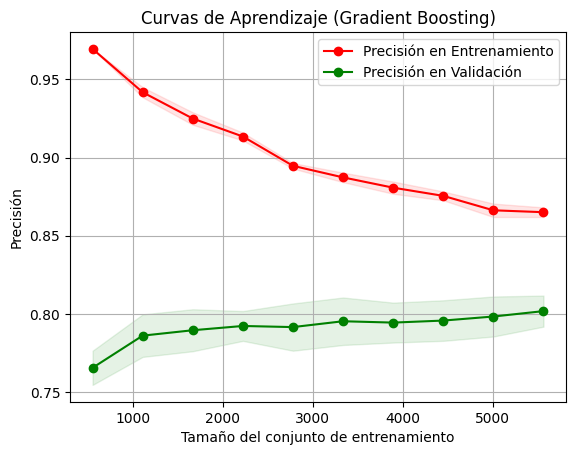

In [115]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    random_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calcular medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar
plt.figure()
plt.title("Curvas de Aprendizaje (Gradient Boosting)")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.grid()

# Área sombreada para desviación estándar
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Líneas de precisión en entrenamiento y validación
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión en Validación")

plt.legend(loc="best")
plt.show()


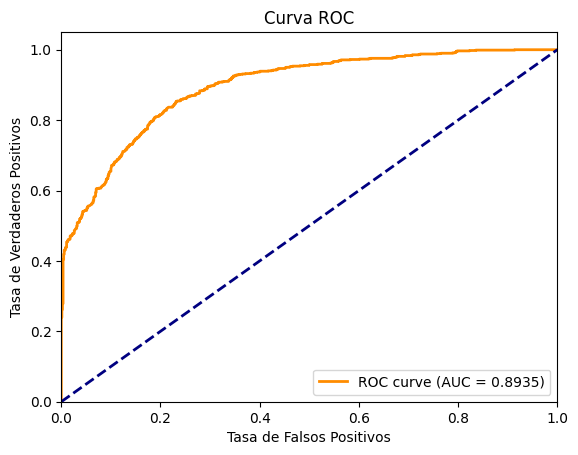

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predecir probabilidades para la curva ROC
y_pred_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

# Generar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


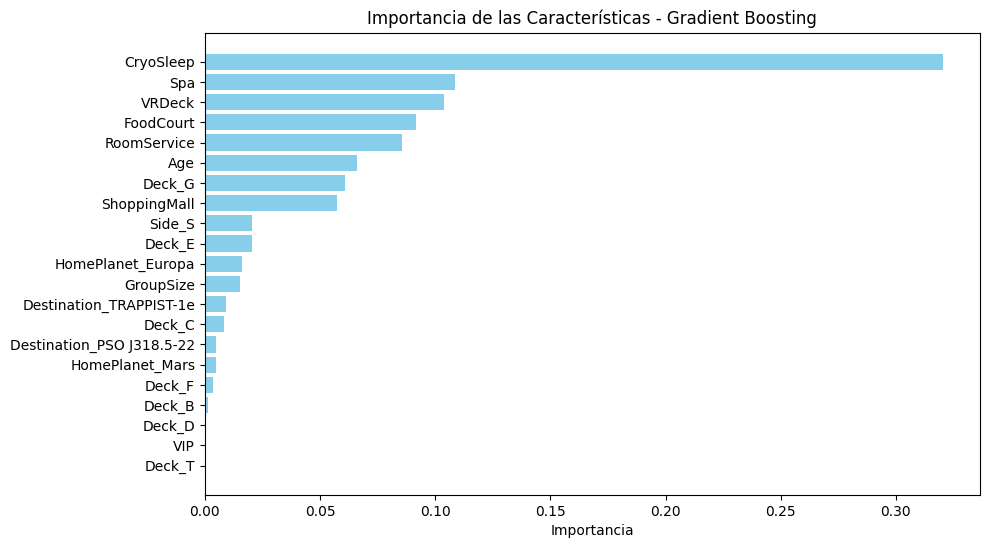

In [117]:
# Obtener las importancias de las características
feature_importances = random_search.best_estimator_.feature_importances_

# Crear un dataframe para las importancias
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Gradient Boosting')
plt.gca().invert_yaxis()  # Invertir el eje para que las características más importantes aparezcan arriba
plt.show()


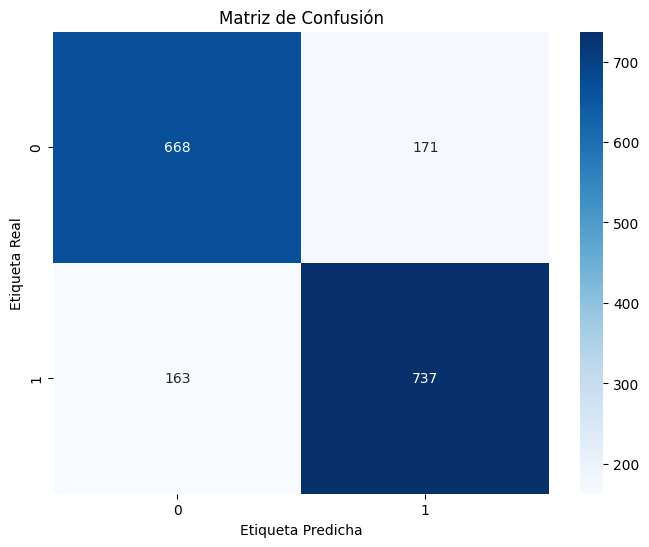

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir etiquetas
y_pred = random_search.best_estimator_.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


In [119]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenar el modelo final con los mejores hiperparámetros
best_params = {
    'subsample': 0.8,
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_depth': 5,
    'learning_rate': 0.1
}

# Crear el modelo con los mejores parámetros
final_model = GradientBoostingClassifier(**best_params, random_state=20)

# Entrenar el modelo con los datos de entrenamiento completos
final_model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5, min_samples_leaf=4,
                           min_samples_split=10, random_state=20,
                           subsample=0.8)

In [121]:
# Separar 'PassengerId' del conjunto de test
X_test_final = test_data.drop(columns=['PassengerId'])  

# Generar predicciones con el modelo
test_predictions = final_model.predict(X_test_final)

# Crear el DataFrame de predicciones utilizando 'PassengerId' y 'Transported'
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': test_predictions})

# Guardar las predicciones en un archivo CSV
output.to_csv('predicciones_finales.csv', index=False)

print("Predicciones guardadas correctamente.")


Predicciones guardadas correctamente.
